## OBJECTIVE: To create a model that predicts the prices of cars


### Dataset features; 
* Car_ID: Unique id of each observation (Interger)
* Symboling:Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
* carCompany: Name of car company (Categorical)
* fueltype: Car fuel type i.e gas or diesel (Categorical)
* aspiration: Aspiration used in a car (Categorical)
* doornumber: Number of doors in a car (Categorical)
* carbody: body of car (Categorical)
* drivewheel: type of drive wheel (Categorical)
* enginelocation: Location of car engine (Categorical)
* wheelbase: Weelbase of car (Numeric)
* carlength: Length of car (Numeric)
* carwidth: Width of car (Numeric)
* carheight: height of car (Numeric)
* curbweight: The weight of a car without occupants or baggage. (Numeric)
* enginetype: Type of engine. (Categorical)
* cylindernumber: cylinder placed in the car (Categorical)
* enginesize: Size of car (Numeric)
* fuelsystem: Fuel system of car (Categorical)
* boreratio: Boreratio of car (Numeric)
* stroke: Stroke or volume inside the engine (Numeric)
* compressionratio: compression ratio of car (Numeric)
* horsepower: Horsepower (Numeric)
* peakrpm: car peak rpm (Numeric)
* citympg: Mileage in city (Numeric)
* highwaympg: Mileage on highway (Numeric)
* price(Dependent variable): Price of car (Numeric) 


### IMPORT LIBRARIES

In [1492]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

### IMPORT DATASET

In [1493]:
data = pd.read_csv(r"C:\Users\Akunna Anyamkpa\Documents\PROJECT - CarPrice Prediction\CarPrice.csv")
data.head(6)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


In [1494]:
data.shape

(205, 26)

In [1495]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### DROPPING COLUMNS WITH OBJECT DATATYPES 

In [1496]:
data.drop('car_ID', axis='columns', inplace=True) #Dropping the car_ID column
data.drop('CarName', axis='columns', inplace=True) #Dropping the CarName column
data.drop('fueltype', axis='columns', inplace=True) #Dropping the fueltype column 
data.drop('aspiration', axis='columns', inplace=True) #Dropping the aspiration column
data.drop('doornumber', axis='columns', inplace=True) #Dropping the doornumber column
data.drop('carbody', axis='columns', inplace=True) #Dropping the carbody column
data.drop('cylindernumber', axis='columns', inplace=True) #Dropping the cylindernumber column
data.drop('drivewheel', axis='columns', inplace=True) #Dropping the drivewheel column
data.drop('enginelocation', axis='columns', inplace=True) #Dropping the enginelocation column
data.drop('enginetype', axis='columns', inplace=True) #Dropping the enginetype column
data.drop('fuelsystem', axis='columns', inplace=True) #Dropping the fuelsystem column

In [1497]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


### QUANTITATIVE VARIABLE ANALYSIS

In [1498]:
data.describe().round(2)
# There are no null values in the dataset

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


### CHECKING RELATIONSHIP BETWEEN FEATURES

In [1499]:
corr_matrix = data.corr().round(2)
corr_matrix

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.00,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.13,-0.01,-0.18,0.07,0.27,-0.04,0.03,-0.08
wheelbase,-0.53,1.00,0.87,0.80,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
carlength,-0.36,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.70,0.68
carwidth,-0.23,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76
carheight,-0.54,0.59,0.49,0.28,1.00,0.30,0.07,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.12
curbweight,-0.23,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.84
enginesize,-0.11,0.57,0.68,0.74,0.07,0.85,1.00,0.58,0.20,0.03,0.81,-0.24,-0.65,-0.68,0.87
boreratio,-0.13,0.49,0.61,0.56,0.17,0.65,0.58,1.00,-0.06,0.01,0.57,-0.25,-0.58,-0.59,0.55
stroke,-0.01,0.16,0.13,0.18,-0.06,0.17,0.20,-0.06,1.00,0.19,0.08,-0.07,-0.04,-0.04,0.08
compressionratio,-0.18,0.25,0.16,0.18,0.26,0.15,0.03,0.01,0.19,1.00,-0.20,-0.44,0.32,0.27,0.07


### DATA PREPARATION

In [1500]:
# INPUT-FEATURES_INDEPENDENT VARIABLE
X = data.drop(columns = ['price']) # When input is all features except price
X_1 = data['enginesize'].values.reshape(-1,1) # When input is enginesize only
X_2 = data[["enginesize","highwaympg"]] # When inputs are enginesize and highwaympg 
X_3 = data[["curbweight","enginesize","citympg","highwaympg"]] # When inputs are enginesize and highway 

# OUTPUT FEATURE_DEPENDANT VARIABLE 
y = data['price'] #target variable 

#### Positive Correlation

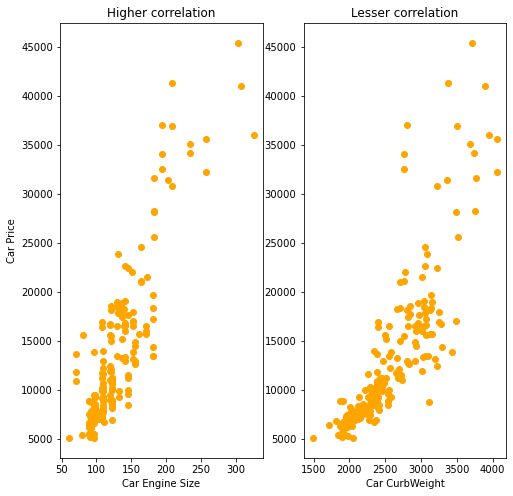

In [1501]:
# Scatter Graph 
fig = plt.figure(figsize=(8, 8)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(data['enginesize'],y, c = "orange")
ax2.scatter(data['curbweight'],y, c = "orange")

ax1.set_title('Higher correlation')
ax1.set_xlabel('Car Engine Size')
ax1.set_ylabel('Car Price')

ax2.set_title('Lesser correlation')
ax2.set_xlabel('Car CurbWeight')
ax2.set_ylabel('')

plt.show()

#### Negative Correlation 

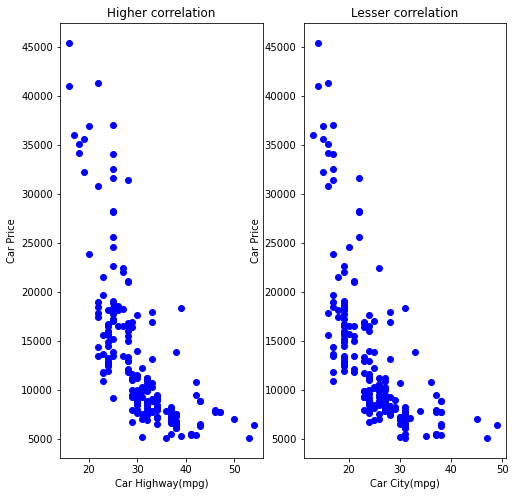

In [1502]:
# Scatter Graph 
fig = plt.figure(figsize=(8, 8)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(data['highwaympg'],y, c = "blue")
ax2.scatter(data['citympg'],y, c = "blue") 

ax1.set_title('Higher correlation')
ax1.set_xlabel('Car Highway(mpg)')
ax1.set_ylabel('Car Price')

ax2.set_title('Lesser correlation')
ax2.set_xlabel('Car City(mpg)')
ax2.set_ylabel('Car Price')

plt.show()

### LINEAR REGRESSION MODELING 

In [1503]:
model = LinearRegression()

### FIRST -----

#### PREDICTIVE MODEL

In [1504]:
model.fit(X_1, y)  # Method takes Input set and Output set --- training model

pred_1 = model.predict(X_1) # Make predictions using Input values for testing

#### Determining the Slope and Intercept

In [1505]:
Slope_value = model.coef_.round(2)
Intercept_value = model.intercept_.round(2)

print("SLOPE VALUE :",Slope_value)
print("\n INTERCEPT VALUE :",Intercept_value)

SLOPE VALUE : [167.7]

 INTERCEPT VALUE : -8005.45


#### PREDICTION

In [1506]:
price = model.predict([[152],[136],[209],[70]]).round(1) 
print("Car Prices :",price)

Car Prices : [17484.7 14801.5 27043.5  3733.4]


#### MODEL EVALUATION

In [1507]:
# Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.
mse = mean_squared_error(y,pred_1)
rmse = np.sqrt(mse)
rmse

3870.4342657576967

In [1508]:
print(r2_score(y, pred_1).round(2)*100,"%") # R-Squared Evaluation Technique 

76.0 %


### SECOND -----

#### PREDICTIVE MODEL

In [1509]:
model.fit(X_2, y)  # Method takes Input set and Output set --- training model

pred_2 = model.predict(X_2) # Make predictions using Input values for testing

#### Determining the Slope and Intercept

In [1510]:
Slope_value = model.coef_.round(2)
Intercept_value = model.intercept_.round(2)

print("SLOPE VALUE :",Slope_value)
print("\n INTERCEPT VALUE :",Intercept_value)

SLOPE VALUE : [ 142.38 -225.98]

 INTERCEPT VALUE : 2156.73


#### PREDICTION

In [1511]:
price = model.predict([[152,26],[136,25],[209,22],[70,23]]).round(1)  
print("Car Prices :",price)

Car Prices : [17923.1 15871.  26942.8  6925.8]


#### MODEL EVALUATION

In [1512]:
# Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.
mse = mean_squared_error(y,pred_2)
rmse = np.sqrt(mse)
rmse

3698.159111653715

In [1513]:
print(r2_score(y, pred_2).round(2)*100,"%") # R-Squared Evaluation Technique 

78.0 %


### THIRD -----

#### PREDICTIVE MODEL

In [1514]:
model.fit(X_3, y)  # Method takes Input set and Output set --- training model

pred_3 = model.predict(X_3) # Make predictions using Input values for testing

#### Determining the Slope and Intercept

In [1515]:
Slope_value = model.coef_.round(2)
Intercept_value = model.intercept_.round(2)

print("SLOPE VALUE :",Slope_value)
print("\n INTERCEPT VALUE :",Intercept_value)

SLOPE VALUE : [   4.35  111.63 -336.62  220.8 ]

 INTERCEPT VALUE : -10300.84


#### PREDICTION

In [1516]:
price = model.predict([[2823,152,19,26],[2507,136,19,25],[3380,209,16,22],[2380,70,17,23]]).round(1)  
print("Car Prices :",price)

Car Prices : [18285.  14904.3 27196.1  7216.2]


#### MODEL EVALUATION

In [1517]:
# Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.
mse = mean_squared_error(y,pred_3)
rmse = np.sqrt(mse)
rmse

3549.758176212535

In [1518]:
print(r2_score(y, pred_3).round(2)*100,"%") # R-Squared Evaluation Technique 

80.0 %


### FOURTH -----

#### PREDICTIVE MODEL

In [1519]:
model.fit(X, y)  # Method takes Input set and Output set --- training model

pred = model.predict(X) # Make predictions using Input values for testing

#### Determining the Slope and Intercept

In [1520]:
Slope_value = model.coef_.round(2)
Intercept_value = model.intercept_.round(2)

print("SLOPE VALUE :",Slope_value)
print("\n INTERCEPT VALUE :",Intercept_value)

SLOPE VALUE : [ 2.85880e+02  1.67700e+02 -9.48200e+01  4.66620e+02  1.94750e+02
  1.88000e+00  1.16780e+02 -9.84430e+02 -3.05616e+03  2.86480e+02
  3.25000e+01  2.36000e+00 -2.86940e+02  1.91300e+02]

 INTERCEPT VALUE : -51650.65


#### PREDICTION

In [1521]:
price = model.predict([[1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9,154,5000,19,26],
                       [2,99.8,177.3,66.3,53.1,2507,136,3.19,3.4,8.5,110,5500,19,25],
                       [0,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8,182,5400,16,22],
                       [3,95.3,169,65.7,49.6,2380,70,3.33,3.255,9.4,101,6000,17,23]]) 
print("Car Prices :",price.round(2)) 

Car Prices : [17723.08 15493.53 26860.63  8545.08]


#### MODEL EVALUATION

In [1522]:
# Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.
mse = mean_squared_error(y,pred)
rmse = np.sqrt(mse)
rmse

3067.2257440338026

In [1523]:
print(r2_score(y, pred).round(2)*100,"%") # R-Squared Evaluation Technique 

85.0 %


## DECISION TREE REGRESSION

In [1524]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [1525]:
DecisionTreeRegModel = DecisionTreeRegressor(random_state=2)
DecisionTreeRegModel.fit(X_train,y_train)

DecisionTreeRegressor(random_state=2)

In [1526]:
pred_DTG = DecisionTreeRegModel.predict(X_test)
pred_DTG 

array([36880., 15998.,  8949., 12170., 33900.,  7349.,  7609.,  8058.,
        8845.,  7995., 15250.,  7975., 11694., 10898., 45400.,  6338.,
        5399., 12764.,  6989.,  9233., 10245., 14399.,  7349.,  5348.,
        7609., 36880.,  8449., 16515.,  7349., 15985., 33900.,  6229.,
        6785., 19045.,  7957., 33900., 11694., 11845.,  6575., 14869.,
        8845.])

In [1527]:
prediction = DecisionTreeRegModel.predict([[1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9,154,5000,19,26],
               [2,99.8,177.3,66.3,53.1,2507,136,3.19,3.4,8.5,110,5500,19,25],
               [0,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8,182,5400,16,22],
               [3,95.3,169,65.7,49.6,2380,70,3.33,3.255,9.4,101,6000,17,23]])
prediction

array([16500., 15250., 36880., 11845.])

#### MODEL EVALUATION

In [1528]:
# Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.
mse = mean_squared_error(y_test,pred_DTG)
rmse = np.sqrt(mse)
rmse

2759.4824932464926

In [1529]:
# The r2 score varies between 0 and 100%
print(r2_score(y_test, pred_DTG).round(2)*100,"%") # R-Squared Evaluation Technique 

90.0 %


## RANDOM FOREST REGRESSION

In [1530]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [1531]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [1532]:
pred_RFG = regressor.predict(X_test)
pred_RFG

array([36293.81      , 18789.05333333,  9080.34666667, 13240.99666667,
       28038.5       ,  7335.50041667,  7951.40333333,  8030.19666667,
       10243.41111111,  8183.82666667, 14890.25444444,  7988.37333333,
       14689.98611111, 10753.95666667, 40684.94      ,  6353.5425    ,
        5864.62647222, 13506.02333333,  8327.46611111,  9707.24222222,
       10382.18277778, 15245.625     ,  7284.62708333,  5958.09008333,
        7164.69      , 36193.92      ,  9253.83666667, 16824.95      ,
        7287.93041667, 16340.98333333, 28110.185     ,  6589.39      ,
        7934.84833333, 19808.94666667,  8009.37333333, 28161.81333333,
       10638.33111111, 12512.88      ,  6902.03213889, 14448.23      ,
        8497.30777778])

In [1533]:
prediction = regressor.predict([[1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9,154,5000,19,26],
               [2,99.8,177.3,66.3,53.1,2507,136,3.19,3.4,8.5,110,5500,19,25],
               [0,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8,182,5400,16,22],
               [3,95.3,169,65.7,49.6,2380,70,3.33,3.255,9.4,101,6000,17,23]])  
prediction.round(2)

array([16475.02, 14486.49, 36193.92, 12512.88])

In [1534]:
# Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.
mse = mean_squared_error(y_test,pred_RFG)
rmse = np.sqrt(mse)
rmse

1772.5070712140157

In [1535]:
# The r2 score varies between 0 and 100%
print(r2_score(y_test, pred_RFG).round(2)*100,"%") # R-Squared Evaluation Technique 

96.0 %
